## Helper Notebook to Inspect  PNW Dataset





- All waveform data downloaded from [IRIS DMC](https://ds.iris.edu/ds/nodes/dmc/).
- Events and phase information are downloaded from [ANSS/ComCat](https://earthquake.usgs.gov/data/comcat/) using [libcomcat](https://github.com/usgs/libcomcat).

- Please download datasets manually from Goole Drive. See link below.
---
 ##### Yiyu Ni (niyiyu@uw.edu)
 ##### Earth and Space Sciences
 ##### University of Washington

In [1]:
# ... suppress pandas future warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import h5py
import obspy
import pandas as pd
import numpy as np

# ... plotting lib
import matplotlib
import matplotlib.dates as mdates
import matplotlib.pyplot as plt

# ... datetime interaction
from datetime import datetime
from datetime import timedelta as dt
from obspy.core.utcdatetime import UTCDateTime

# ... lib for comcat access
# ... If you work in Google Colab, I coundn't find a way to install libcomcat 
# ... through pip. Please skip this libcomcat part.
#
from libcomcat.dataframes import get_phase_dataframe
from libcomcat.search import get_event_by_id

# ... mount drive through google colab
# 
# from google.colab import drive
# drive.mount('/content/drive')

In [2]:
def interactive_plotting(df, index, seconds_before = 3, seconds_after = 3):
    source_id = df.iloc[index]['source_id']
    net = df.iloc[index]['station_network_code']
    sta = df.iloc[index]['station_code']
    loc =  df.iloc[index]['station_location_code']
    cha = df.iloc[index]['trace_channel']
    sample_p = df.iloc[index]['trace_P_arrival_sample']
    sample_s = df.iloc[index]['trace_S_arrival_sample']
    trace_starttime = df.iloc[index]['trace_start_time']
    sample_rate = df.iloc[index]['trace_sampling_rate_hz']

    starttime = datetime.utcfromtimestamp(UTCDateTime(trace_starttime).timestamp)
    x = [starttime + dt(seconds = i/sample_rate) for i in np.arange(15001)]
    p_time = [(starttime + dt(seconds = sample_p/sample_rate)) for _ in range(10)]
    s_time = [(starttime + dt(seconds = sample_s/sample_rate)) for _ in range(10)]
    plt.figure(figsize = (12, 6), dpi = 80)
    myFmt = mdates.DateFormatter('%X.%f\n%Y/%m/%d')
    plt.subplots_adjust(hspace = 0.4)
    plt.subplot(2, 1, 1)
    plt.title("%s.%s..%s" % (net, sta, cha), fontsize = 20)
    plt.plot(x, np.array(stream).T, '.-')
    plt.grid(True)
    plt.plot(p_time, np.linspace(-data.max(), data.max(), 10), 
             'r--', label = 'PNSN P Pick', linewidth = 2)
    plt.gca().xaxis.set_major_formatter(myFmt)
    plt.legend()
    plt.xlim([p_time[0] - dt(seconds = seconds_before),  
              p_time[0] + dt(seconds = seconds_after)])   # Only look at seconds before/after arrival


    plt.subplot(2, 1, 2)
    plt.plot(x, np.array(stream).T, '.-')
    plt.grid(True)
    plt.plot(s_time, np.linspace(-data.max(), data.max(), 10), 
             'k--', label = 'PNSN S Pick', linewidth = 2)
    plt.gca().xaxis.set_major_formatter(myFmt)
    plt.legend()
    plt.xlim([s_time[0] - dt(seconds = seconds_before),  
              s_time[0] + dt(seconds = seconds_after)])   # Only look at seconds before/after arrival

## Load the PNW dataset
- waveform (waveforms.hdf5 ~35G): https://drive.google.com/file/d/1Ktee6VV4Nz6I0oo0IjGiW8BX_Zzb7wyE/view?usp=sharing
- metadata (metadata.csv ~19MB): https://drive.google.com/file/d/1TcG1Ey5pxMEZatPXiHufBK0XC_SgO1Bl/view?usp=sharing
- This dataset follows the structure of [seisbench](https://seisbench.readthedocs.io/en/latest/). See [here](https://seisbench.readthedocs.io/en/latest/pages/data_format.html) to learn more about the  file structure.

In [3]:
# be sure to chech the location of waveforms and metadata

path_to_data = "/path/to/data/"
f = h5py.File(path_to_data + "waveforms.hdf5", "r")
df = pd.read_csv(path_to_data + "metadata.csv")
df.insert(0, "index", range(len(df)))
df

/tmp/ipykernel_873368/650946064.py:6: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(path_to_data + "metadata.csv")


,index,source_id,source_origin_time,source_latitude_deg,source_longitude_deg,source_depth_km,split,source_magnitude,station_network_code,trace_channel,...,station_latitude_deg,station_longitude_deg,station_elevation_m,trace_name,trace_sampling_rate_hz,trace_start_time,trace_S_arrival_sample,trace_P_arrival_sample,CODE,trace_S-P_arrival_sample
0,0,uw10516388,2000-12-16T17:41:52.090000Z,47.594000,-122.585667,25.571,dev,2.20,UW,EHZ,...,0.0,0.0,0.0,"bucket4$0,:3,:15001",100.0,2000-12-16T17:41:02.090000Z,7834.0,6637.0,uw10516388UWRER,NaN
1,1,uw10516388,2000-12-16T17:41:52.090000Z,47.594000,-122.585667,25.571,train,2.20,UW,EHZ,...,0.0,0.0,0.0,"bucket4$1,:3,:15001",100.0,2000-12-16T17:41:02.090000Z,7858.0,6642.0,uw10516388UWRCS,NaN
2,2,uw10516388,2000-12-16T17:41:52.090000Z,47.594000,-122.585667,25.571,train,2.20,UW,EHZ,...,0.0,0.0,0.0,"bucket10$0,:3,:15001",100.0,2000-12-16T17:41:02.090000Z,8496.0,7020.0,uw10516388UWWPW,NaN
3,3,uw10516388,2000-12-16T17:41:52.090000Z,47.594000,-122.585667,25.571,train,2.20,UW,EHZ,...,0.0,0.0,0.0,"bucket8$0,:3,:15001",100.0,2000-12-16T17:41:02.090000Z,7797.0,6607.0,uw10516388UWFMW,NaN
4,4,uw10516388,2000-12-16T17:41:52.090000Z,47.594000,-122.585667,25.571,train,2.20,UW,EHZ,...,0.0,0.0,0.0,"bucket6$0,:3,:15001",100.0,2000-12-16T17:41:02.090000Z,8881.0,7215.0,uw10516388UWELK,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103952,103952,uw61565622,2020-01-01T11:04:33.210000Z,47.568667,-122.797000,18.470,train,1.22,PB,EHZ,...,0.0,0.0,0.0,"bucket4$10587,:3,:15001",100.0,2020-01-01T11:03:43.210000Z,7178.0,6232.0,uw61565622PBB941,NaN
103953,103953,uw61565537,2020-01-01T03:44:56.640000Z,46.848500,-121.757000,0.430,train,0.97,UW,HHZ,...,0.0,0.0,0.0,"bucket2$10544,:3,:15001",100.0,2020-01-01T03:44:06.640000Z,5125.0,5067.0,uw61565537UWRCM,NaN
103954,103954,uw61565537,2020-01-01T03:44:56.640000Z,46.848500,-121.757000,0.430,train,0.97,UW,EHZ,...,0.0,0.0,0.0,"bucket1$10650,:3,:15001",100.0,2020-01-01T03:44:06.640000Z,5136.0,5069.0,uw61565537UWSTAR01,NaN
103955,103955,uw61565537,2020-01-01T03:44:56.640000Z,46.848500,-121.757000,0.430,test,0.97,UW,EHZ,...,0.0,0.0,0.0,"bucket3$10529,:3,:15001",100.0,2020-01-01T03:44:06.640000Z,5132.0,5070.0,uw61565537UWRCS,NaN


## Do some stream selection only if necessary

In [4]:
df_filt = df

# df_filt = df_filt[df_filt['source_id'] == 'uw61631152']      # select a source id
df_filt = df_filt[df_filt['source_magnitude'] >= 5]          # select filter out magnitude
# df_filt = df_filt[df_filt['station_network_code'] == 'UW']   # select network code
# df_filt = df_filt[df_filt['station_code'] == 'VLL']          # select station code

df_filt

,index,source_id,source_origin_time,source_latitude_deg,source_longitude_deg,source_depth_km,split,source_magnitude,station_network_code,trace_channel,...,station_latitude_deg,station_longitude_deg,station_elevation_m,trace_name,trace_sampling_rate_hz,trace_start_time,trace_S_arrival_sample,trace_P_arrival_sample,CODE,trace_S-P_arrival_sample
38083,38083,uw60507871,2013-02-27T22:25:44.340000Z,43.103,-126.849667,4.182,test,5.1,PB,EHZ,...,0.0,0.0,0.0,"bucket1$3925,:3,:15001",100.0,2013-02-27T22:24:54.340000Z,11537.0,8539.0,uw60507871PBB032,NaN


## Specify an index by looking at the "index" column of filtered dataframe

In [5]:
# specify a index:

# index = 38082

# ... or randomly look at all data set:

index = np.random.randint(103957)

df.iloc[index]

index                                             50205
source_id                                    uw60843347
source_origin_time          2014-08-13T23:46:05.950000Z
source_latitude_deg                           47.850167
source_longitude_deg                        -120.770833
source_depth_km                                   8.023
split                                              test
source_magnitude                                   1.69
station_network_code                                 UW
trace_channel                                       EHZ
station_code                                        WRW
station_location_code                               NaN
station_latitude_deg                                0.0
station_longitude_deg                               0.0
station_elevation_m                                 0.0
trace_name                       bucket8$5064,:3,:15001
trace_sampling_rate_hz                            100.0
trace_start_time            2014-08-13T23:45:15.

## Do filtering

In [6]:
tn = df.iloc[index]['trace_name']
bucket, narray = tn.split('$')
x, y, z = iter([int(i) for i in narray.split(',:')])
data = f['/data/%s' % bucket][x, :y, :z]

stream = obspy.Stream()
for i in range(3):
    tr = obspy.Trace()
    tr.data = data[i, :]
    tr.stats.sampling_rate = df.iloc[index]['trace_sampling_rate_hz']
    stream.append(tr)
    
# stream.filter("bandpass", freqmin = 10, freqmax = 20)
# stream.filter("lowpass",  freq = 20)
# stream.filter("highpass",  freq = 20)

## Interactive plotting of stream
**Note that interactive plotting is not available at Google Colab**

<IPython.core.display.Javascript object>


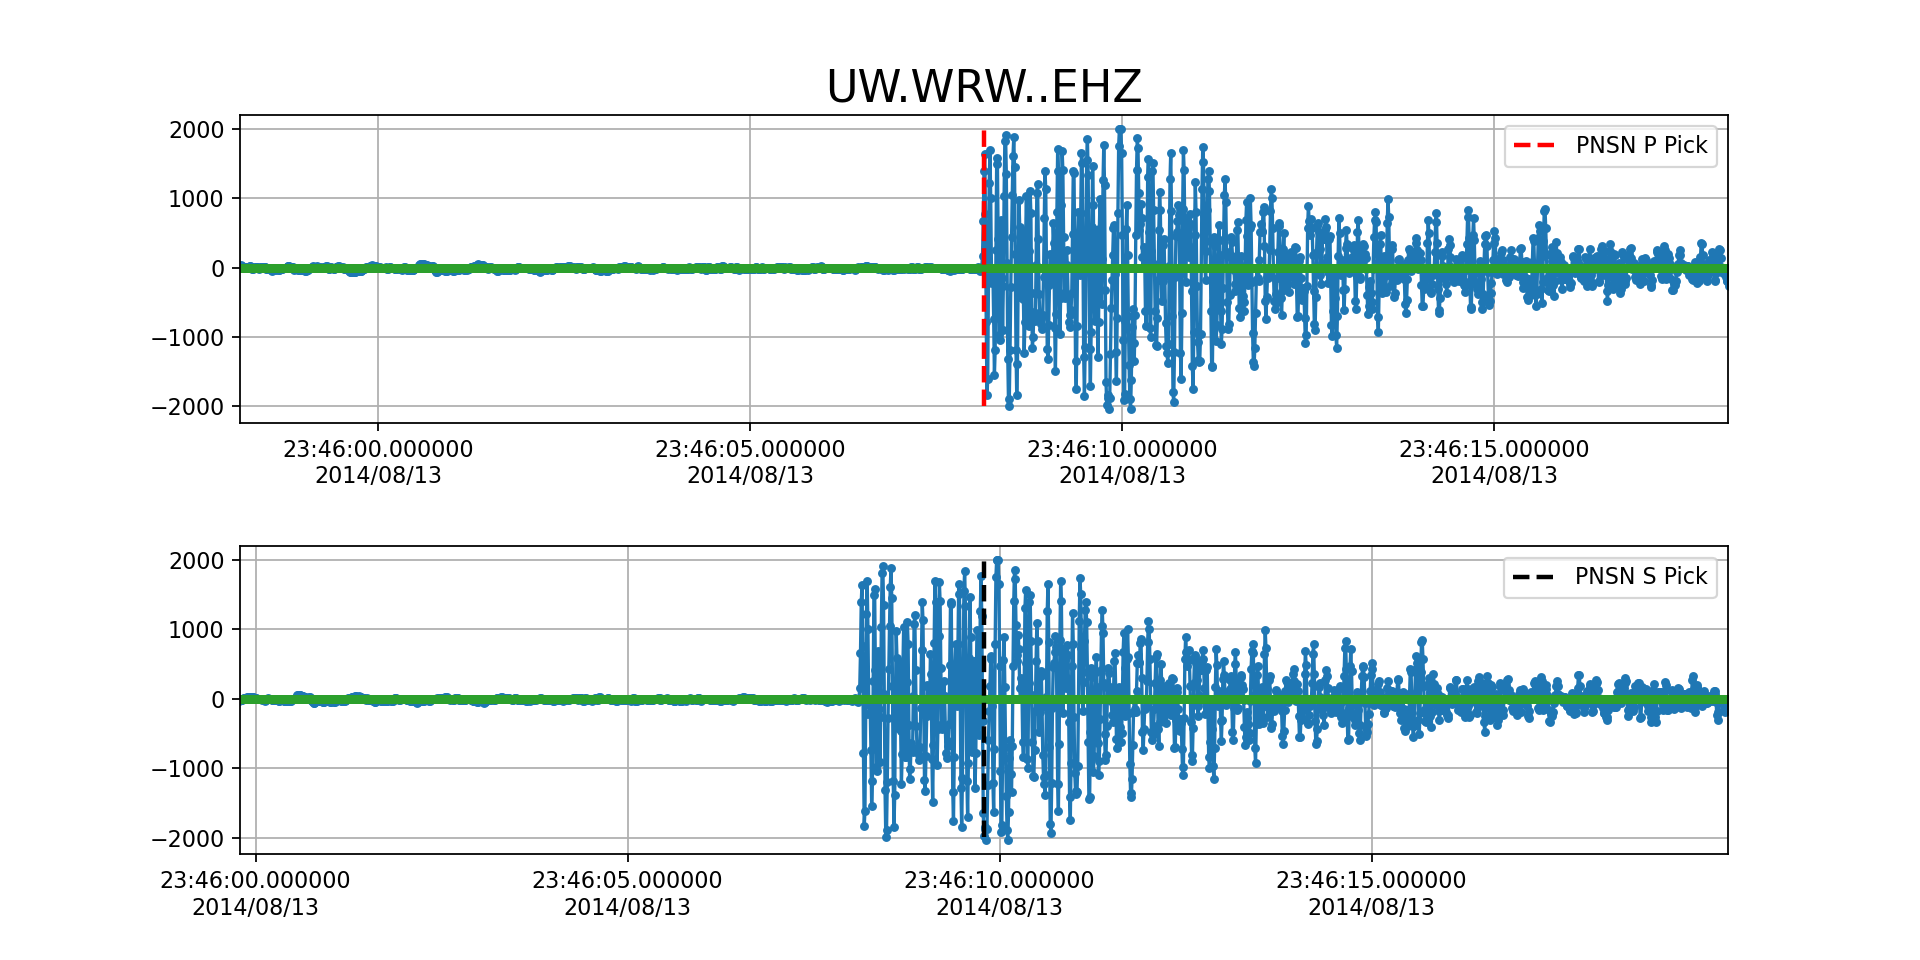

In [7]:
%matplotlib notebook
interactive_plotting(df, index, seconds_before = 10, seconds_after = 10)

## Use ComCat Python interface to check the arrivals from ANSS
**Note that libcomcat is not available at Google Colab**

In [8]:
source_id = df.iloc[index]['source_id']
detail = get_event_by_id(source_id, includesuperseded=False)
df_cc = get_phase_dataframe(detail, catalog='uw')
df_cc

,Channel,Distance,Azimuth,Phase,Arrival Time,Status,Residual,Weight,Agency
0,UW.WRW.EHZ.,0.07579,274.8,P,2014-08-13 23:46:08.140000,manual,0.04,1.87,UW
1,UW.NEL.EHZ.,0.3629,52.4,S,2014-08-13 23:46:18.080000,manual,-0.13,1.4,UW
2,UW.WAT.EHZ.,0.5707,105.2,P,2014-08-13 23:46:16.640000,manual,-0.14,0.84,UW
3,UW.HTW.EHZ.,0.6741,266.4,P,2014-08-13 23:46:18.120000,manual,0.1,1.15,UW
4,UW.WRW.EHZ.,0.07579,274.8,S,2014-08-13 23:46:09.790000,manual,0.01,0.93,UW
5,TA.C06D.BHZ.,0.1105,311.3,P,2014-08-13 23:46:08.470000,manual,-0.1,0.93,UW
6,TA.C06D.BHE.,0.1105,311.3,S,2014-08-13 23:46:10.420000,manual,-0.19,0.93,UW
7,UW.SLF.EHZ.,0.1858,118.8,P,2014-08-13 23:46:09.790000,manual,0.0,1.87,UW
8,UW.NEL.EHZ.,0.3629,52.4,P,2014-08-13 23:46:13.020000,manual,0.18,1.87,UW
9,UW.GPW.EHZ.,0.3641,317.6,P,2014-08-13 23:46:12.840000,manual,-0.02,1.4,UW
